In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression 
%matplotlib inline
%config InlineBakend.figure_format = 'svg'
from sklearn.svm import SVC
from sklearn.metrics import r2_score

## Задание №1

In [2]:
boston = load_boston()

In [3]:
data = boston.data

In [4]:
feature_name = boston.feature_names

In [5]:
target = boston.target

In [96]:
X = pd.DataFrame(data, columns=feature_name)
X.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [97]:
y = pd.DataFrame(target, columns=['Price'])

In [8]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2,  random_state=42)

In [9]:
scaler = StandardScaler()

In [10]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))

In [11]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [12]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [13]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [27]:
print('\033[1mДо:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


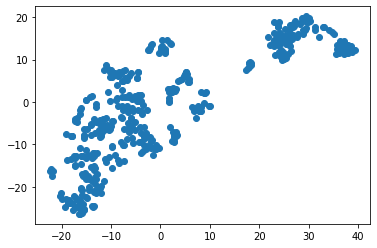

In [15]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.show()

## Задание 2

In [16]:
KM_model = KMeans(n_clusters=3, max_iter=1000, random_state=42)
labels_train = KM_model.fit_predict(X_train_scaled)

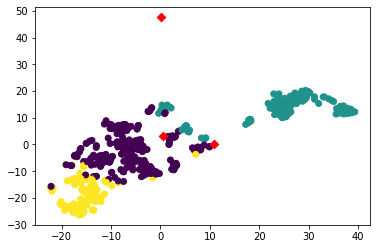

In [17]:
claster_centers = scaler.inverse_transform(KM_model.cluster_centers_)
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)
plt.scatter(claster_centers[:,0],claster_centers[:,1], marker='D', color='red')
plt.show()

In [18]:
X_train['Clasters'] = labels_train
X_train['Price'] = y_train

<ipython-input-18-ebd81f147f10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Clasters'] = labels_train
<ipython-input-18-ebd81f147f10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Price'] = y_train


In [19]:
print('{} - средние значение Price'.format(X_train.groupby('Clasters')['Price'].mean()))

Clasters
0    24.958115
1    16.165354
2    27.788372
Name: Price, dtype: float64 - средние значение Цены


In [20]:
print('{} - средние значение Crime'.format(X_train.groupby('Clasters')['CRIM'].mean()))

Clasters
0     0.421660
1    10.797028
2     0.073566
Name: CRIM, dtype: float64 - средние значение Цены


### Задание №3

In [36]:
label_test = KM_model.predict(X_test_scaled)


In [93]:
X_test['Claster_pred'] = label_test
X_test['Price'] = y_test

<ipython-input-93-f538dab7f8e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Claster_pred'] = label_test
<ipython-input-93-f538dab7f8e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Price'] = y_test


C:\Users\1\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Claster_pred', ylabel='Price'>

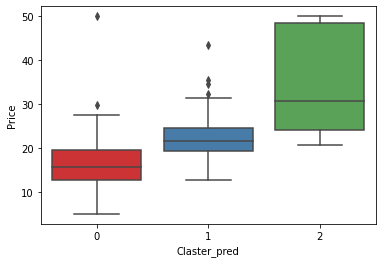

In [90]:
sns.boxplot(X_test['Claster_pred'], y_test['Price'], palette='Set1')

In [94]:
print('{} - средние значение Price'.format(X_test.groupby('Claster_pred')['Price'].mean()))

Claster_pred
0    16.710526
1    22.690909
2    34.311111
Name: Price, dtype: float64 - средние значение Price


In [95]:
print('{} - средние значение Crime'.format(X_test.groupby('Claster_pred')['CRIM'].mean()))

Claster_pred
0    9.419182
1    0.219297
2    0.040703
Name: CRIM, dtype: float64 - средние значение Price
